# Deep Learning | Perceptrons and MLP for Classification

### Dataset: Iris | Framework: Keras (Tensorflow)

## 🔹 1. Setup & Data Loading

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [24]:
# Load dataset
iris = load_iris()

In [25]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [26]:
X = iris.data
y = iris.target

In [27]:
type(X)

numpy.ndarray

In [28]:
feature_names = iris.feature_names
target_names = iris.target_names

In [29]:
type(iris)



sklearn.utils._bunch.Bunch

- type(iris)
- sklearn.utils._branch.Bunch -> tells us that data is in dictionary shape

In [30]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Making a dataframe from numpy

- currently the data is in numpy ndarray
- to change, you can do

In [31]:
y_cat = to_categorical(y)

In [32]:
df = pd.DataFrame(data=X, columns=feature_names)
df['target']= y
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 🔹 2. MLP Basics: First 2 features (Iris)

### ✅ Preprocess the dataset

In [33]:
X_vis = X[:, :2]

In [34]:
# Scale inputs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [36]:
X_scaled.shape

(150, 4)

In [45]:
y_cat.shape


(150, 3)

In [37]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)

### ✅ Visualization: Input Space

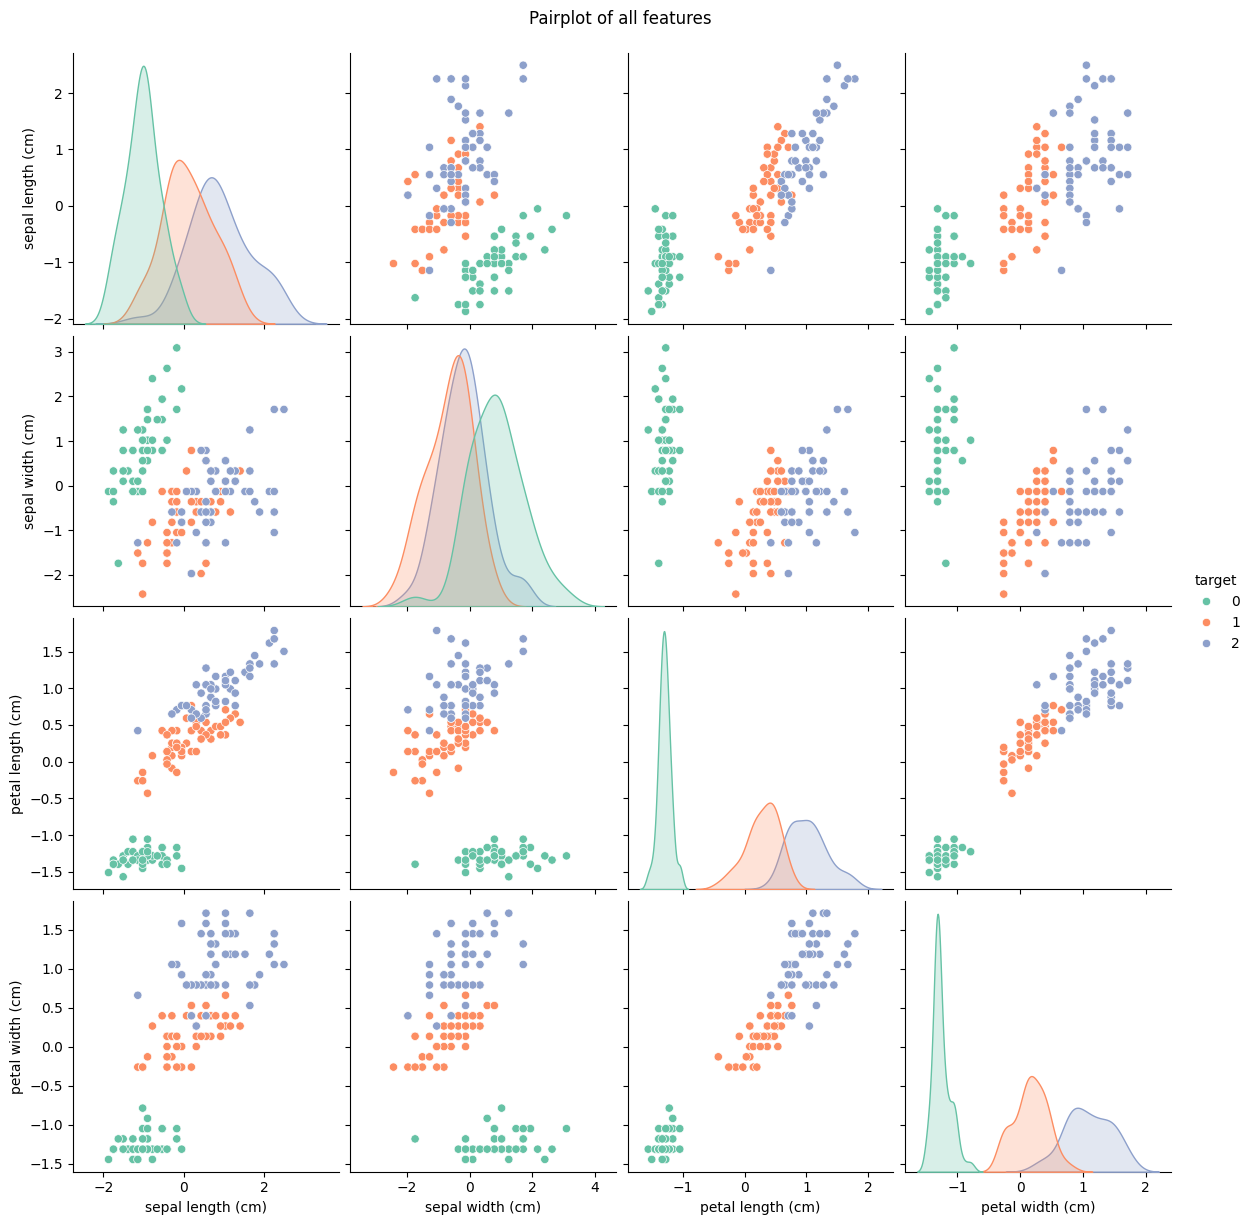

In [38]:
df_plot = pd.DataFrame(X_scaled, columns=feature_names)
df_plot['target'] = y
sns.pairplot(df_plot, hue='target', palette='Set2', height=3)
plt.suptitle("Pairplot of all features", y=1.02)
plt.show()

### EDA insights

- class (Iris-Setosa) 0 is well separated
- Iris versicolour and Iris virginica are mixed
- We could remove the latter two but I am going to try with all three

### ✅ Baseline Model: No Hidden Layer

In [39]:
model_linear = Sequential([
    InputLayer(shape=(4,)),

    # 4 is the number of input features 
    
    Dense(3, activation='softmax')
    
    # 3 neurons = 3 classes
    # softmax for multiclass
])

In [40]:
model_linear.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# optimizer for gradient descent
# cat cross entropy for classes

In [41]:
model_linear.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

### Param explanation

4 input features * 3 neurons = 12 + 3(biases, each neuron having its own) = 15

In [42]:
history_linear = model_linear.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4156 - loss: 1.0928 
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4096 - loss: 1.0807
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4338 - loss: 1.0645
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4204 - loss: 1.0842
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4694 - loss: 0.9960
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4642 - loss: 1.0012
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4308 - loss: 1.0161
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4487 - loss: 0.9898
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4112 - loss: 1.0047
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4746 - loss: 0.9877
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4883 - loss: 0.9861
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5146 - loss: 0.9515


In [43]:
# Evaluation
y_pred_linear = np.argmax(model_linear.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [44]:
print("Accuracy (No Hidden Layer):", accuracy_score(y_true, y_pred_linear))

Accuracy (No Hidden Layer): 0.7


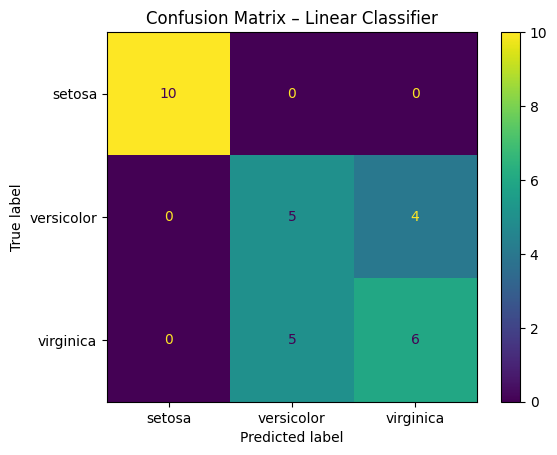

In [46]:
ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred_linear), display_labels=target_names).plot()
plt.title("Confusion Matrix – Linear Classifier")
plt.show()

### ✅ MLP with Hidden Layer

In [47]:
model_mlp = Sequential([
    InputLayer(shape=(4,)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_mlp.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

### Params explanation 

4(input) * 8(neurons) = 32 + 8 = 40 
8 (input) * 3(neurons) = 24 + 3 = 27 

In [48]:
history_mlp = model_mlp.fit(X_train, y_train, epochs=50, verbose=0)

In [49]:
y_pred_mlp = np.argmax(model_mlp.predict(X_test), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


In [50]:
print("Accuracy (With Hidden Layer):", accuracy_score(y_true, y_pred_mlp))

Accuracy (With Hidden Layer): 0.9


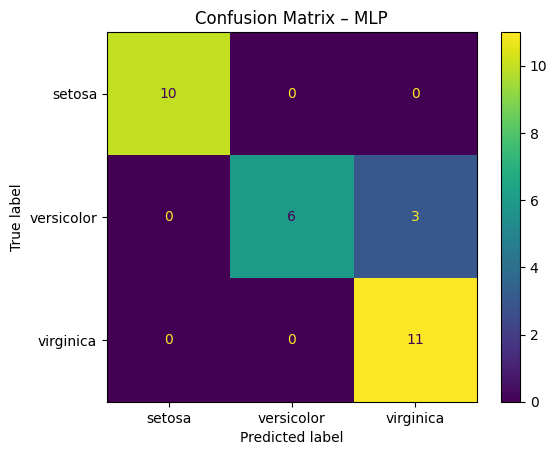

In [51]:
ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred_mlp), display_labels=target_names).plot()
plt.title("Confusion Matrix – MLP")
plt.show()

## 🔹 3. Visualizing Decision Boundaries

In [ ]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                           np.arange(y_min, y_max, 0.02))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid)
    preds = np.argmax(probs, axis=1).reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.4, cmap='Pastel2')
    plt.scatter(X[:, 0], X[:, 1], c=np.argmax(y, axis=1), edgecolors='k', cmap='Dark2')
    plt.title(title)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.show()

In [55]:
X_scaled.shape

(150, 4)

In [57]:
y_cat.shape

(150, 3)

In [59]:
model_linear

<Sequential name=sequential_1, built=True>

In [61]:
# Decision boundaries
plot_decision_boundary(model_linear, X_scaled[:,:2], y_cat, "Linear Model Decision Boundary")

InvalidArgumentError: Graph execution error:

Detected at node sequential_1_1/dense_1_1/BiasAdd defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\asyncio\base_events.py", line 608, in run_forever

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\asyncio\base_events.py", line 1936, in _run_once

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\asyncio\events.py", line 84, in _run

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\IPython\core\interactiveshell.py", line 3047, in run_cell

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\IPython\core\interactiveshell.py", line 3102, in _run_cell

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\IPython\core\interactiveshell.py", line 3306, in run_cell_async

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\IPython\core\interactiveshell.py", line 3489, in run_ast_nodes

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\IPython\core\interactiveshell.py", line 3549, in run_code

  File "C:\Users\Zehra\AppData\Local\Temp\ipykernel_25864\1679525136.py", line 2, in <module>

  File "C:\Users\Zehra\AppData\Local\Temp\ipykernel_25864\1977314983.py", line 7, in plot_decision_boundary

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 560, in predict

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 259, in one_step_on_data_distributed

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 249, in one_step_on_data

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 104, in predict_step

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\layers\layer.py", line 910, in __call__

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\ops\operation.py", line 58, in __call__

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\models\sequential.py", line 221, in call

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\models\functional.py", line 183, in call

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\ops\function.py", line 171, in _run_through_graph

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\models\functional.py", line 643, in call

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\layers\layer.py", line 910, in __call__

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\ops\operation.py", line 58, in __call__

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\layers\core\dense.py", line 146, in call

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\ops\numpy.py", line 237, in add

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\backend\tensorflow\sparse.py", line 493, in sparse_wrapper

  File "c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\backend\tensorflow\numpy.py", line 129, in add

Matrix size-incompatible: In[0]: [32,2], In[1]: [4,3]
	 [[{{node sequential_1_1/dense_1_1/BiasAdd}}]] [Op:__inference_one_step_on_data_distributed_9429]

3759/3759 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


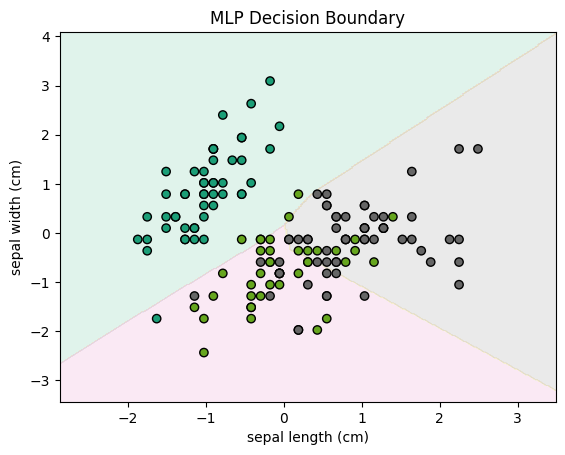

In [57]:
plot_decision_boundary(model_mlp, X_scaled, y_cat, "MLP Decision Boundary")

## 🔹 3. MLP Using All 4 Features of Iris Dataset

### ✅ Prepare Full Feature Input

In [62]:
# Reload original features (all 4)
X_full = iris.data

# Standardize all 4 features
scaler_full = StandardScaler()
X_full_scaled = scaler_full.fit_transform(X_full)

# Split again
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_full_scaled, y_cat, test_size=0.2, random_state=42)

### ✅ Define and Train MLP

In [63]:
model_full = Sequential([
    InputLayer(shape=(4,)),
    Dense(10, activation='relu'),
    Dense(6, activation='relu'),
    Dense(3, activation='softmax')
])

model_full.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_full.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

In [64]:
history_full = model_full.fit(X_train_f, y_train_f, epochs=300, verbose=0)

### ✅ Evaluate and Visualize

In [65]:
# Predict
y_pred_full = np.argmax(model_full.predict(X_test_f), axis=1)
y_true_full = np.argmax(y_test_f, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


In [66]:
# Accuracy and confusion matrix
print("Accuracy (All Features MLP):", accuracy_score(y_true_full, y_pred_full))

Accuracy (All Features MLP): 1.0


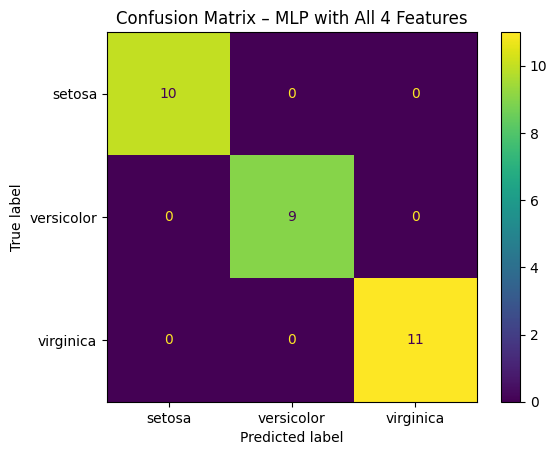

In [67]:
ConfusionMatrixDisplay(confusion_matrix(y_true_full, y_pred_full), display_labels=target_names).plot()
plt.title("Confusion Matrix – MLP with All 4 Features")
plt.show()

### ✅ Plot Learning Curves

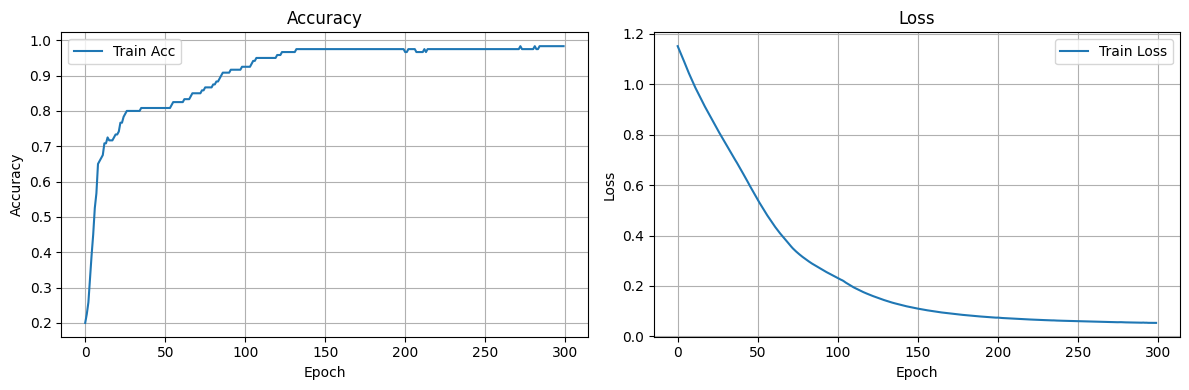

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
axs[0].plot(history_full.history['accuracy'], label='Train Acc')
axs[0].set_title('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Loss plot
axs[1].plot(history_full.history['loss'], label='Train Loss')
axs[1].set_title('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

## 🔹 4. Update Model Training (with Validation Data)

In [69]:
model_full_2 = Sequential([
    InputLayer(shape=(4,)),
    Dense(10, activation='relu'),
    Dense(6, activation='relu'),
    Dense(3, activation='softmax')
])

model_full_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_full_2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

In [73]:
X_train_f.shape

(120, 4)

In [74]:
# Train with validation split
history_full_2 = model_full_2.fit(
    X_train_f, y_train_f,
    validation_split=0.2,
    epochs=300,
    verbose=1
)

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - accuracy: 0.2930 - loss: 1.0625 - val_accuracy: 0.4167 - val_loss: 0.9975
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2773 - loss: 1.0553 - val_accuracy: 0.4583 - val_loss: 0.9892
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3008 - loss: 1.0374 - val_accuracy: 0.4583 - val_loss: 0.9818
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3229 - loss: 1.0207 - val_accuracy: 0.4583 - val_loss: 0.9741
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2799 - loss: 1.0241 - val_accuracy: 0.4583 - val_loss: 0.9664
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3346 - loss: 1.0063 - val_accuracy: 0.4583 - val_loss: 0.9585
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3464 - loss: 1.0001 - val_accuracy: 0.5000 - val_loss: 0.9512
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3737 - loss: 0.9944 - val_accuracy: 0.5833 - val_loss

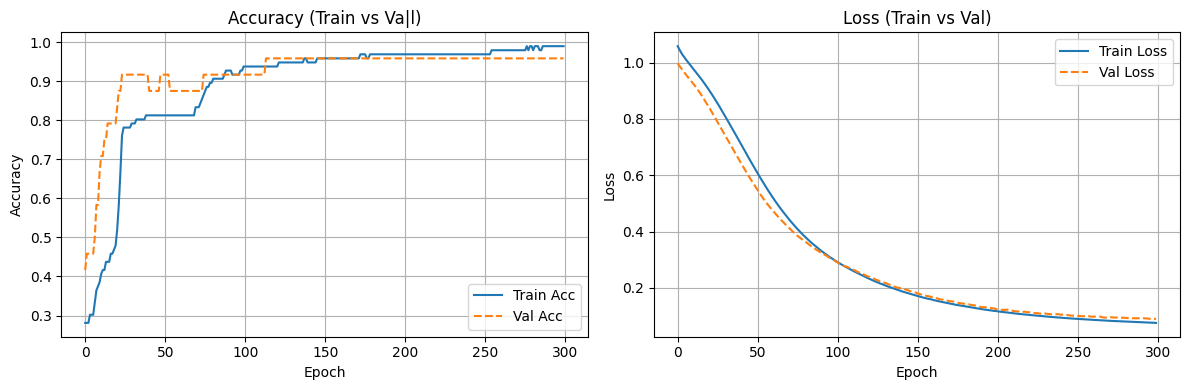

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
axs[0].plot(history_full_2.history['accuracy'], label='Train Acc')
axs[0].plot(history_full_2.history['val_accuracy'], label='Val Acc', linestyle='--')
axs[0].set_title('Accuracy (Train vs Va|l)')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Loss plot
axs[1].plot(history_full_2.history['loss'], label='Train Loss')
axs[1].plot(history_full_2.history['val_loss'], label='Val Loss', linestyle='--')
axs[1].set_title('Loss (Train vs Val)')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Accuracy (All Features MLP): 1.0


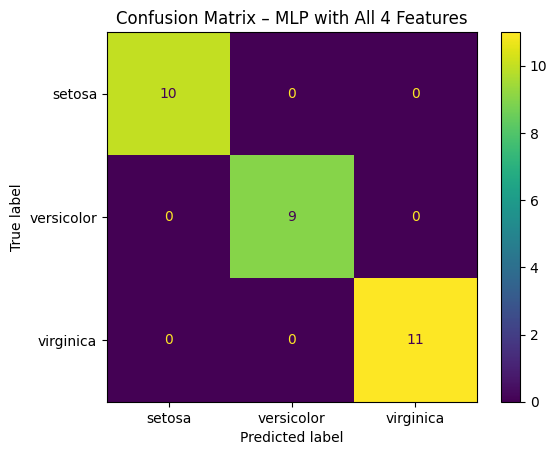

In [77]:
# Predict
y_pred_full_2 = np.argmax(model_full_2.predict(X_test_f), axis=1)

# Accuracy and confusion matrix
print("Accuracy (All Features MLP):", accuracy_score(y_true_full, y_pred_full_2))

ConfusionMatrixDisplay(confusion_matrix(y_true_full, y_pred_full_2), display_labels=target_names).plot()
plt.title("Confusion Matrix – MLP with All 4 Features")
plt.show()

## 🔹 5. Early Stopping and Model Checkpointing

In [78]:
model_full_3 = Sequential([
    Dense(10, input_shape=(4,), activation='relu'),
    Dense(6, activation='relu'),
    Dense(3, activation='softmax')
])

model_full_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_full_3.summary()

c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

### ✅ Set Up Callbacks

In [79]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,  # Recover best weights, not just stop
    verbose=1
)

checkpoint = ModelCheckpoint(
    'best_model_iris.keras',  # File name (SavedModel format)
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)


### ✅ Train with Callbacks

In [80]:
history_full_3 = model_full_3.fit(
    X_train_f, y_train_f,
    validation_split=0.2,
    epochs=200,
    callbacks=[early_stop, checkpoint],
    verbose=2
)

Epoch 1/200

Epoch 1: val_loss improved from inf to 1.08281, saving model to best_model_iris.keras
3/3 - 2s - 729ms/step - accuracy: 0.1771 - loss: 1.1092 - val_accuracy: 0.3333 - val_loss: 1.0828
Epoch 2/200

Epoch 2: val_loss improved from 1.08281 to 1.07565, saving model to best_model_iris.keras
3/3 - 0s - 58ms/step - accuracy: 0.1875 - loss: 1.1008 - val_accuracy: 0.3333 - val_loss: 1.0756
Epoch 3/200

Epoch 3: val_loss improved from 1.07565 to 1.06799, saving model to best_model_iris.keras
3/3 - 0s - 57ms/step - accuracy: 0.2083 - loss: 1.0925 - val_accuracy: 0.3750 - val_loss: 1.0680
Epoch 4/200

Epoch 4: val_loss improved from 1.06799 to 1.06003, saving model to best_model_iris.keras
3/3 - 0s - 64ms/step - accuracy: 0.2500 - loss: 1.0839 - val_accuracy: 0.4583 - val_loss: 1.0600
Epoch 5/200

Epoch 5: val_loss improved from 1.06003 to 1.05139, saving model to best_model_iris.keras
3/3 - 0s - 57ms/step - accuracy: 0.3333 - loss: 1.0751 - val_accuracy: 0.5000 - val_loss: 1.0514
Epo

### ✅ Evaluate and Visualize

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Accuracy (All Features MLP): 1.0


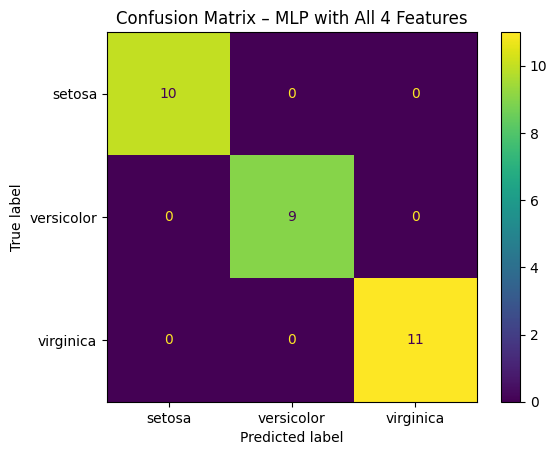

In [81]:
# Predict
y_pred_full_3 = np.argmax(model_full_3.predict(X_test_f), axis=1)

# Accuracy and confusion matrix
print("Accuracy (All Features MLP):", accuracy_score(y_true_full, y_pred_full_3))

ConfusionMatrixDisplay(confusion_matrix(y_true_full, y_pred_full_3), display_labels=target_names).plot()
plt.title("Confusion Matrix – MLP with All 4 Features")
plt.show()

### ✅ Load Best Model and Evaluate

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Accuracy of Best Saved Model: 1.0


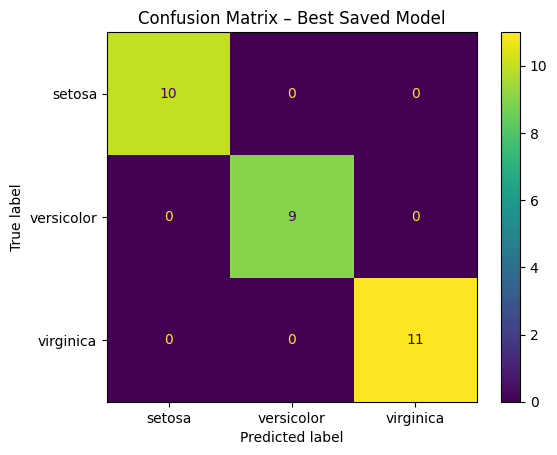

In [82]:
best_model = load_model('best_model_iris.keras')

y_pred_best = np.argmax(best_model.predict(X_test_f), axis=1)
print("Accuracy of Best Saved Model:", accuracy_score(y_true_full, y_pred_best))
ConfusionMatrixDisplay(confusion_matrix(y_true_full, y_pred_best), display_labels=target_names).plot()
plt.title("Confusion Matrix – Best Saved Model")
plt.show()


(30, 4)